# APPLIED MACHINE LEARNING ASSIGNMENT 1

Lecturer's Name: Paul <br />
Student Name: Yap Li Xen (Kelvin) <br />
Student ID: P7414389 <br />
Class: DSAI/2021

# PART B: REGRESSION

Contents
========
<ol>
    <li>Background</li>
    <li>Exploratory Data Analysis</li>
    <li>Data Preparation</li>
    <ol>
        <li>Data Cleaning</li>
        <li>Data Transformation</li>
    </ol>
    <li>Train Model (Single Model)</li>
    <ol>
        <li>Select Model</li>
        <li>Train Test Split</li>
        <li>Train Model</li>
        <li>Score Model</li>
    </ol>
    <li>Evaluate Model (Single Model)</li>
    <ol>
        <li>confusion_matrix</li>
        <li>plot_confusion_matrix</li>
        <li>classification_report</li>
    </ol>
    <li>Model Improvement (Single Model)</li>
    <ol>
        <li>Hyperparameter Tuning</li>
        <li>Bias-variance trade-off</li>
    </ol>
    <li>Train Model (Multiple Models)</li>
    <li>Kaggle Competition</li>
</ol>

Background
==========
This dataset contains house sale prices for King County, which includes Seattle. It includes homes sold between May 2014 and May 2015.

Exploratory Data Analysis
======================
A first view of the dataset to understand the data structure and data value.

In [800]:
import pandas as pd
import numpy as np

df = pd.read_csv('data/kc_house_data.csv', sep=',')
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


![](image\data_description.png)

![](data/data_description.png)

In [801]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

In [802]:
df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,4.580302e+09,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,2.876566e+09,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In [803]:
from matplotlib import pyplot as plt
# import seaborn as sns

# sns.pairplot(df, hue="Survived", height=2)
# plt.show()

In [804]:
# corr = df.corr()
# sns.heatmap(corr, cmap="YlGnBu",annot=True,
#             xticklabels=corr.columns.values,
#             yticklabels=corr.columns.values) 
# plt.show()

Data Preparation
==============
* Data Cleaning
* Data Transformation

### 1. Feature Selection
To remove features that doesn't bring impact or less important to the classification

In [805]:
df = df.drop(['id', 'date'], 1)
df.shape

print(df[:10])
# print(df.head())
# df["price"] = pd.to_numeric(df["price"], downcast="float")
# df=df[['price','bedrooms','bathrooms','sqft_living','sqft_lot','floors','waterfront','view','condition','grade','yr_built']]

df['sqft'] = df['sqft_living'] + df['sqft_lot']
df = df.drop(['sqft_living', 'sqft_lot'], 1)

df['bathrooms'] = np.round(df['bathrooms'])
print(df[:10])
# print(df.head())

       price  bedrooms  bathrooms  sqft_living  sqft_lot  floors  waterfront  \
0   221900.0         3       1.00         1180      5650     1.0           0   
1   538000.0         3       2.25         2570      7242     2.0           0   
2   180000.0         2       1.00          770     10000     1.0           0   
3   604000.0         4       3.00         1960      5000     1.0           0   
4   510000.0         3       2.00         1680      8080     1.0           0   
5  1225000.0         4       4.50         5420    101930     1.0           0   
6   257500.0         3       2.25         1715      6819     2.0           0   
7   291850.0         3       1.50         1060      9711     1.0           0   
8   229500.0         3       1.00         1780      7470     1.0           0   
9   323000.0         3       2.50         1890      6560     2.0           0   

   view  condition  grade  sqft_above  sqft_basement  yr_built  yr_renovated  \
0     0          3      7        1180  

### 2. SibSp & Parch
To normalise the number of sibling/spouse/parents/children aboard the Titanic into single column **hasFamily** with the value 1 (yes) or 0 (no)

In [806]:
# df['hasFamily'] = np.where((df['SibSp'] <= 0) & (df['Parch'] <= 0), 0, 1)
# df = df.drop(['SibSp', 'Parch'], 1)
# print(df.head())
# df.shape

### 3. Fare
To group Fare into multiple folds

In [807]:
# fare_bins=[0,10,20,40,60,80,100,200,600]
# fare_labels=[1,2,3,4,5,6,7,8]
# df['Fare_Group'] = pd.cut(df['Fare'], bins=fare_bins, labels=fare_labels, right=False)
# df = df.drop('Fare', 1)
# print(df.head())
# df.shape

### 4. Age
To normalise Age into 4 categories
* Children (0-12)
* Adult (13-59)
* Elderly (60 and above)
* Unknown (No Age Info)

In [808]:
# df['Age'] = df['Age'].fillna(-1)
# age_bins=[-1,0,13,60,120]
# age_labels=['Unknown','Children','Adult','Elderly']
# df['Age_Group'] = pd.cut(df['Age'], bins=age_bins, labels=age_labels, right=False)
# df = df.drop('Age', 1)
# print(df.head())
# df.shape

### 5. Encoding
* column Sex
* column Embarked

In [809]:
# from sklearn.preprocessing import OneHotEncoder

# ohe = OneHotEncoder()
# df = df[df['Embarked'].notna()]
# df['Embarked'] = ohe.fit_transform(df["Embarked"].values.reshape(-1,1)).toarray()
# df['Sex'] = ohe.fit_transform(df["Sex"].values.reshape(-1,1)).toarray()

# print(df.head())
# print(df.shape)

In [810]:
# df = pd.get_dummies(df)
# print(df.head())
# df.shape

Train Model (Single Model)
======================

### Select Model
Lasso is selected as training model following the cheat-sheet in our use case

![](image/sklearn_cheatsheet.png)

### Train Test Split
Split training and test data into (80/20) and fix random state to 42

In [811]:
from sklearn.model_selection import train_test_split

# df = df[:1000]
print(df[:20])
df.info()
X = df.drop('price', axis=1)
y = df['price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

        price  bedrooms  bathrooms  floors  waterfront  view  condition  \
0    221900.0         3        1.0     1.0           0     0          3   
1    538000.0         3        2.0     2.0           0     0          3   
2    180000.0         2        1.0     1.0           0     0          3   
3    604000.0         4        3.0     1.0           0     0          5   
4    510000.0         3        2.0     1.0           0     0          3   
5   1225000.0         4        4.0     1.0           0     0          3   
6    257500.0         3        2.0     2.0           0     0          3   
7    291850.0         3        2.0     1.0           0     0          3   
8    229500.0         3        1.0     1.0           0     0          3   
9    323000.0         3        2.0     2.0           0     0          3   
10   662500.0         3        2.0     1.0           0     0          3   
11   468000.0         2        1.0     1.0           0     0          4   
12   310000.0         3  

### Train Model (Lasso)

In [812]:
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR

model = Lasso()
# model = Ridge(alpha=1.0, normalize=True)
# model = LinearRegression()
# model = KNeighborsRegressor()
# model = DecisionTreeRegressor()
# model = SVR(kernel='linear')
model.fit(X_train, y_train)

Lasso()

### Score Model

In [813]:
training_data_score = model.score(X_train, y_train)
print("Training Data Score: {:.2f}%".format(training_data_score*100))

test_data_score = model.score(X_test, y_test)
print("Test Data Score: {:.2f}%".format(test_data_score*100))

Training Data Score: 70.15%
Test Data Score: 69.68%


Evaluate Model
=============
* r2_score
* mean_squared_error

In [814]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

y_predict = model.predict(X_test)
r2 = r2_score(y_test, y_predict)
mse = mean_squared_error(y_test, y_predict)

print(y_predict)
print(r2)
print("R2 Score: {:.2f}".format(r2))
print("MSE Score: {:.2f}".format(mse))


[ 409513.84247726 1537475.6290285   548148.26935563 ...  346071.14447808
  204995.46107544  424046.77180627]
0.6967506153863758
R2 Score: 0.70
MSE Score: 36063711479.83


Model Improvement (Single Model)
=============================
* Hyperparameter Tuning
* Bias-variance trade-off

### 1. Hyperparameter Tuning
To use GridSearchCV which includes Cross Validation to identify best paramter and best score.

In [815]:
from sklearn.model_selection import GridSearchCV

# lasso = Lasso()
# ridge = Ridge()
# param_grid = {'alpha': [0.01,0.1,1.0,10.0,100.0], 'tol': [0.01,0.1,1.0,10.0,100.0], 'normalize': [True,False]}
param_grid = {'alpha': [0.01,0.1,1.0,10.0,100.0]}
# param_grid = {'normalize': [True, False]}
# param_grid = {'n_jobs': [1,2,3]}
# param_grid = {'n_neighbors': [11,12,13,14,15,16,17,18,19]}
# param_grid = {'criterion': ['squared_error', 'friedman_mse', 'absolute_error', 'poisson']}
# param_grid = {'kernel': ['linear', 'poly', 'rbf', 'sigmoid', 'precomputed']}

grid_search = GridSearchCV(model, param_grid=param_grid, cv=3, verbose=3, return_train_score=True)
grid_search.fit(X_train, y_train);

Fitting 3 folds for each of 5 candidates, totalling 15 fits
[CV] alpha=0.01 ......................................................
[CV] ...... alpha=0.01, score=(train=0.711, test=0.681), total=   0.0s
[CV] alpha=0.01 ......................................................
[CV] ...... alpha=0.01, score=(train=0.701, test=0.701), total=   0.0s
[CV] alpha=0.01 ......................................................
[CV] ...... alpha=0.01, score=(train=0.695, test=0.714), total=   0.0s
[CV] alpha=0.1 .......................................................
[CV] ....... alpha=0.1, score=(train=0.711, test=0.681), total=   0.0s
[CV] alpha=0.1 .......................................................
[CV] ....... alpha=0.1, score=(train=0.701, test=0.701), total=   0.0s
[CV] alpha=0.1 .......................................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s


[CV] ....... alpha=0.1, score=(train=0.695, test=0.714), total=   0.0s
[CV] alpha=1.0 .......................................................
[CV] ....... alpha=1.0, score=(train=0.711, test=0.681), total=   0.0s
[CV] alpha=1.0 .......................................................
[CV] ....... alpha=1.0, score=(train=0.701, test=0.701), total=   0.0s
[CV] alpha=1.0 .......................................................
[CV] ....... alpha=1.0, score=(train=0.695, test=0.714), total=   0.0s
[CV] alpha=10.0 ......................................................
[CV] ...... alpha=10.0, score=(train=0.711, test=0.681), total=   0.0s
[CV] alpha=10.0 ......................................................
[CV] ...... alpha=10.0, score=(train=0.701, test=0.701), total=   0.0s
[CV] alpha=10.0 ......................................................
[CV] ...... alpha=10.0, score=(train=0.695, test=0.714), total=   0.0s
[CV] alpha=100.0 .....................................................
[CV] .

[Parallel(n_jobs=1)]: Done  15 out of  15 | elapsed:    0.4s finished


In [816]:
print("Best Param: {}".format(grid_search.best_params_))
print("Best Score: {:.2f}%".format(grid_search.best_score_*100))

Best Param: {'alpha': 1.0}
Best Score: 69.90%


### 2. Bias-variance trade-off
To identify Appropriate-fitting

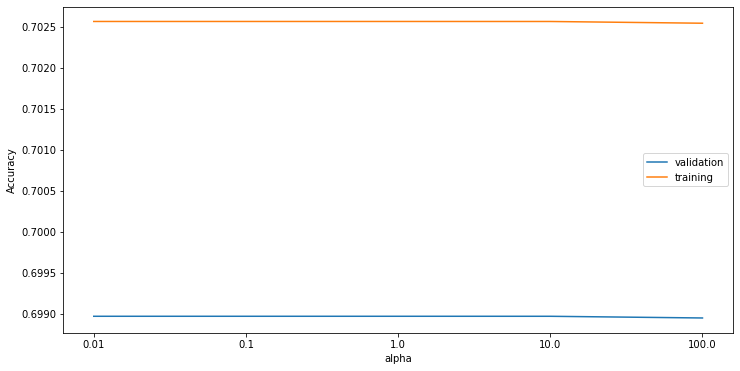

In [817]:
plt.figure(figsize=(12, 6))
validation_score = grid_search.cv_results_["mean_test_score"]
train_score = grid_search.cv_results_["mean_train_score"]
plt.plot(validation_score, label="validation")
plt.plot(train_score, label="training")
plt.xticks(np.arange(5), param_grid['alpha']); plt.xlabel("alpha"); plt.ylabel("Accuracy");plt.legend(loc='best');

Train Model (Multiple Models)
=========================
To train multiple models and compare the scores

### Assign multiple models & their corresponding param_grid into Dictionary Array

In [818]:
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR

Dict = [
    {'model': Lasso(),
     'param_grid': {'alpha': [0.01,0.1,1.0,10.0,100.0], 'tol': [0.01,0.1,1.0,10.0,100.0], 'normalize': [True,False]}},
    {'model': Ridge(),
     'param_grid': {'alpha': [0.01,0.1,1.0,10.0,100.0], 'tol': [0.01,0.1,1.0,10.0,100.0], 'normalize': [True,False]}},
    {'model': LinearRegression(),
     'param_grid': {'fit_intercept': [True,False], 'n_jobs': [1,2,3], 'normalize': [True,False]}},
    {'model': KNeighborsRegressor(),
     'param_grid': {'n_neighbors': [1,2,3,4,5,6,7,8,9]}},
    {'model': DecisionTreeRegressor(),
     'param_grid': {'criterion': ['squared_error', 'friedman_mse', 'absolute_error', 'poisson', 'mse']}}
#     {'model': SVR(),
#      'param_grid': {'kernel': ['linear', 'poly', 'rbf', 'sigmoid', 'precomputed']}}
]

### Loop Dictionary and compile all scores into table

In [819]:
rows = []
for i in Dict:
    # Fit Training Data to model selected
    model = i['model']
    model.fit(X_train, y_train)
    
    # Predict Train Data
    score_train = model.score(X_train, y_train)
#     y_predict_train_data = model.predict(X_train)
#     mse_train = np.mean((y_predict_train_data-y_train)**2)
#     score_train = model.score(X_train, y_train)
    
    # Predict Test Data
    score_test = model.score(X_test, y_test)
#     y_predict_test_data = model.predict(X_test)
#     mse_test = np.mean((y_predict_test_data-y_test)**2)
#     score_test = model.score(X_test, y_test)
    

    # Predict Test Data
    y_predict = model.predict(X_test)
    r2 = r2_score(y_test, y_predict)
    mse = mean_squared_error(y_test, y_predict)
#     y_predict_test_data = model.predict(X_test)
#     mse_test = np.mean((y_predict_test_data-y_test)**2)
#     score_test = model.score(X_test, y_test)
    
    # Perform Hyperparameter Tuning & Cross Validation
    grid_search = GridSearchCV(model, param_grid=i['param_grid'], cv=3, verbose=3, return_train_score=True)
    grid_search.fit(X_train, y_train);
    

    rows.append([model,
                 "{:.2f}%".format(score_train*100), 
                 "{:.2f}%".format(score_test*100), 
                 "{:.2f}".format(r2), 
                 "{:.2f}".format(mse),
                 grid_search.best_params_,
                 "{:.2f}%".format(grid_search.best_score_*100)])

Fitting 3 folds for each of 50 candidates, totalling 150 fits
[CV] alpha=0.01, normalize=True, tol=0.01 ............................
[CV]  alpha=0.01, normalize=True, tol=0.01, score=(train=0.711, test=0.681), total=   0.0s
[CV] alpha=0.01, normalize=True, tol=0.01 ............................
[CV]  alpha=0.01, normalize=True, tol=0.01, score=(train=0.701, test=0.701), total=   0.0s
[CV] alpha=0.01, normalize=True, tol=0.01 ............................
[CV]  alpha=0.01, normalize=True, tol=0.01, score=(train=0.695, test=0.714), total=   0.0s
[CV] alpha=0.01, normalize=True, tol=0.1 .............................
[CV]  alpha=0.01, normalize=True, tol=0.1, score=(train=0.711, test=0.681), total=   0.0s
[CV] alpha=0.01, normalize=True, tol=0.1 .............................
[CV]  alpha=0.01, normalize=True, tol=0.1, score=(train=0.701, test=0.701), total=   0.0s
[CV] alpha=0.01, normalize=True, tol=0.1 .............................
[CV]  alpha=0.01, normalize=True, tol=0.1, score=(train=0.6

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s



[CV] alpha=0.01, normalize=True, tol=1.0 .............................
[CV]  alpha=0.01, normalize=True, tol=1.0, score=(train=0.633, test=0.668), total=   0.0s
[CV] alpha=0.01, normalize=True, tol=10.0 ............................
[CV]  alpha=0.01, normalize=True, tol=10.0, score=(train=0.530, test=0.505), total=   0.0s
[CV] alpha=0.01, normalize=True, tol=10.0 ............................
[CV]  alpha=0.01, normalize=True, tol=10.0, score=(train=0.511, test=0.510), total=   0.0s
[CV] alpha=0.01, normalize=True, tol=10.0 ............................
[CV]  alpha=0.01, normalize=True, tol=10.0, score=(train=0.498, test=0.508), total=   0.0s
[CV] alpha=0.01, normalize=True, tol=100.0 ...........................
[CV]  alpha=0.01, normalize=True, tol=100.0, score=(train=0.530, test=0.505), total=   0.0s
[CV] alpha=0.01, normalize=True, tol=100.0 ...........................
[CV]  alpha=0.01, normalize=True, tol=100.0, score=(train=0.511, test=0.510), total=   0.0s
[CV] alpha=0.01, normalize

[CV]  alpha=1.0, normalize=True, tol=0.01, score=(train=0.695, test=0.714), total=   0.0s
[CV] alpha=1.0, normalize=True, tol=0.1 ..............................
[CV]  alpha=1.0, normalize=True, tol=0.1, score=(train=0.711, test=0.682), total=   0.0s
[CV] alpha=1.0, normalize=True, tol=0.1 ..............................
[CV]  alpha=1.0, normalize=True, tol=0.1, score=(train=0.701, test=0.701), total=   0.0s
[CV] alpha=1.0, normalize=True, tol=0.1 ..............................
[CV]  alpha=1.0, normalize=True, tol=0.1, score=(train=0.695, test=0.714), total=   0.0s
[CV] alpha=1.0, normalize=True, tol=1.0 ..............................
[CV]  alpha=1.0, normalize=True, tol=1.0, score=(train=0.660, test=0.621), total=   0.0s
[CV] alpha=1.0, normalize=True, tol=1.0 ..............................
[CV]  alpha=1.0, normalize=True, tol=1.0, score=(train=0.645, test=0.641), total=   0.0s
[CV] alpha=1.0, normalize=True, tol=1.0 ..............................
[CV]  alpha=1.0, normalize=True, tol=1.

[CV]  alpha=100.0, normalize=True, tol=0.01, score=(train=0.681, test=0.710), total=   0.0s
[CV] alpha=100.0, normalize=True, tol=0.1 ............................
[CV]  alpha=100.0, normalize=True, tol=0.1, score=(train=0.694, test=0.655), total=   0.0s
[CV] alpha=100.0, normalize=True, tol=0.1 ............................
[CV]  alpha=100.0, normalize=True, tol=0.1, score=(train=0.683, test=0.685), total=   0.0s
[CV] alpha=100.0, normalize=True, tol=0.1 ............................
[CV]  alpha=100.0, normalize=True, tol=0.1, score=(train=0.675, test=0.705), total=   0.0s
[CV] alpha=100.0, normalize=True, tol=1.0 ............................
[CV]  alpha=100.0, normalize=True, tol=1.0, score=(train=0.666, test=0.626), total=   0.0s
[CV] alpha=100.0, normalize=True, tol=1.0 ............................
[CV]  alpha=100.0, normalize=True, tol=1.0, score=(train=0.650, test=0.648), total=   0.0s
[CV] alpha=100.0, normalize=True, tol=1.0 ............................
[CV]  alpha=100.0, normaliz

[Parallel(n_jobs=1)]: Done 150 out of 150 | elapsed:    3.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s



[CV] alpha=0.01, normalize=True, tol=0.1 .............................
[CV]  alpha=0.01, normalize=True, tol=0.1, score=(train=0.711, test=0.680), total=   0.0s
[CV] alpha=0.01, normalize=True, tol=0.1 .............................
[CV]  alpha=0.01, normalize=True, tol=0.1, score=(train=0.701, test=0.702), total=   0.0s
[CV] alpha=0.01, normalize=True, tol=0.1 .............................
[CV]  alpha=0.01, normalize=True, tol=0.1, score=(train=0.695, test=0.715), total=   0.0s
[CV] alpha=0.01, normalize=True, tol=1.0 .............................
[CV]  alpha=0.01, normalize=True, tol=1.0, score=(train=0.711, test=0.680), total=   0.0s
[CV] alpha=0.01, normalize=True, tol=1.0 .............................
[CV]  alpha=0.01, normalize=True, tol=1.0, score=(train=0.701, test=0.702), total=   0.0s
[CV] alpha=0.01, normalize=True, tol=1.0 .............................
[CV]  alpha=0.01, normalize=True, tol=1.0, score=(train=0.695, test=0.715), total=   0.0s
[CV] alpha=0.01, normalize=True, 

[CV]  alpha=0.1, normalize=False, tol=10.0, score=(train=0.701, test=0.701), total=   0.0s
[CV] alpha=0.1, normalize=False, tol=10.0 ............................
[CV]  alpha=0.1, normalize=False, tol=10.0, score=(train=0.695, test=0.714), total=   0.0s
[CV] alpha=0.1, normalize=False, tol=100.0 ...........................
[CV]  alpha=0.1, normalize=False, tol=100.0, score=(train=0.711, test=0.681), total=   0.0s
[CV] alpha=0.1, normalize=False, tol=100.0 ...........................
[CV]  alpha=0.1, normalize=False, tol=100.0, score=(train=0.701, test=0.701), total=   0.0s
[CV] alpha=0.1, normalize=False, tol=100.0 ...........................
[CV]  alpha=0.1, normalize=False, tol=100.0, score=(train=0.695, test=0.714), total=   0.0s
[CV] alpha=1.0, normalize=True, tol=0.01 .............................
[CV]  alpha=1.0, normalize=True, tol=0.01, score=(train=0.629, test=0.584), total=   0.0s
[CV] alpha=1.0, normalize=True, tol=0.01 .............................
[CV]  alpha=1.0, normalize

[CV] alpha=10.0, normalize=False, tol=0.1 ............................
[CV]  alpha=10.0, normalize=False, tol=0.1, score=(train=0.711, test=0.682), total=   0.0s
[CV] alpha=10.0, normalize=False, tol=0.1 ............................
[CV]  alpha=10.0, normalize=False, tol=0.1, score=(train=0.701, test=0.701), total=   0.0s
[CV] alpha=10.0, normalize=False, tol=0.1 ............................
[CV]  alpha=10.0, normalize=False, tol=0.1, score=(train=0.695, test=0.713), total=   0.0s
[CV] alpha=10.0, normalize=False, tol=1.0 ............................
[CV]  alpha=10.0, normalize=False, tol=1.0, score=(train=0.711, test=0.682), total=   0.0s
[CV] alpha=10.0, normalize=False, tol=1.0 ............................
[CV]  alpha=10.0, normalize=False, tol=1.0, score=(train=0.701, test=0.701), total=   0.0s
[CV] alpha=10.0, normalize=False, tol=1.0 ............................
[CV]  alpha=10.0, normalize=False, tol=1.0, score=(train=0.695, test=0.713), total=   0.0s
[CV] alpha=10.0, normalize=F

[Parallel(n_jobs=1)]: Done 150 out of 150 | elapsed:    2.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s


[CV]  fit_intercept=True, n_jobs=1, normalize=False, score=(train=0.695, test=0.714), total=   0.0s
[CV] fit_intercept=True, n_jobs=2, normalize=True ....................
[CV]  fit_intercept=True, n_jobs=2, normalize=True, score=(train=0.711, test=0.681), total=   0.0s
[CV] fit_intercept=True, n_jobs=2, normalize=True ....................
[CV]  fit_intercept=True, n_jobs=2, normalize=True, score=(train=0.701, test=0.701), total=   0.0s
[CV] fit_intercept=True, n_jobs=2, normalize=True ....................
[CV]  fit_intercept=True, n_jobs=2, normalize=True, score=(train=0.695, test=0.714), total=   0.0s
[CV] fit_intercept=True, n_jobs=2, normalize=False ...................
[CV]  fit_intercept=True, n_jobs=2, normalize=False, score=(train=0.711, test=0.681), total=   0.0s
[CV] fit_intercept=True, n_jobs=2, normalize=False ...................
[CV]  fit_intercept=True, n_jobs=2, normalize=False, score=(train=0.701, test=0.701), total=   0.0s
[CV] fit_intercept=True, n_jobs=2, normalize=Fal

[Parallel(n_jobs=1)]: Done  36 out of  36 | elapsed:    0.5s finished


Fitting 3 folds for each of 9 candidates, totalling 27 fits
[CV] n_neighbors=1 ...................................................
[CV] ... n_neighbors=1, score=(train=0.999, test=0.320), total=   0.1s
[CV] n_neighbors=1 ...................................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s


[CV] ... n_neighbors=1, score=(train=0.999, test=0.205), total=   0.1s
[CV] n_neighbors=1 ...................................................
[CV] ... n_neighbors=1, score=(train=0.999, test=0.157), total=   0.1s
[CV] n_neighbors=2 ...................................................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.3s remaining:    0.0s


[CV] ... n_neighbors=2, score=(train=0.800, test=0.423), total=   0.2s
[CV] n_neighbors=2 ...................................................
[CV] ... n_neighbors=2, score=(train=0.814, test=0.342), total=   0.1s
[CV] n_neighbors=2 ...................................................
[CV] ... n_neighbors=2, score=(train=0.818, test=0.354), total=   0.1s
[CV] n_neighbors=3 ...................................................
[CV] ... n_neighbors=3, score=(train=0.717, test=0.457), total=   0.1s
[CV] n_neighbors=3 ...................................................
[CV] ... n_neighbors=3, score=(train=0.731, test=0.412), total=   0.2s
[CV] n_neighbors=3 ...................................................
[CV] ... n_neighbors=3, score=(train=0.730, test=0.419), total=   0.1s
[CV] n_neighbors=4 ...................................................
[CV] ... n_neighbors=4, score=(train=0.668, test=0.463), total=   0.2s
[CV] n_neighbors=4 ...................................................
[CV] .

[Parallel(n_jobs=1)]: Done  27 out of  27 | elapsed:    9.3s finished


Fitting 3 folds for each of 5 candidates, totalling 15 fits
[CV] criterion=squared_error .........................................
[CV]  criterion=squared_error, score=(train=nan, test=nan), total=   0.0s
[CV] criterion=squared_error .........................................
[CV]  criterion=squared_error, score=(train=nan, test=nan), total=   0.0s
[CV] criterion=squared_error .........................................
[CV]  criterion=squared_error, score=(train=nan, test=nan), total=   0.0s
[CV] criterion=friedman_mse ..........................................
[CV]  criterion=friedman_mse, score=(train=0.999, test=0.728), total=   0.1s
[CV] criterion=friedman_mse ..........................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 1242, in fit
    super().fit(
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 336, in fit
    criterion = CRITERIA_REG[self.criterion](self.n_outputs_,
KeyError: 'squared_error'

  warnings.warn("Estimator fit failed. The score on this train-test"
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\

[CV]  criterion=friedman_mse, score=(train=1.000, test=0.711), total=   0.1s
[CV] criterion=friedman_mse ..........................................
[CV]  criterion=friedman_mse, score=(train=1.000, test=0.653), total=   0.1s
[CV] criterion=absolute_error ........................................
[CV]  criterion=absolute_error, score=(train=nan, test=nan), total=   0.0s
[CV] criterion=absolute_error ........................................
[CV]  criterion=absolute_error, score=(train=nan, test=nan), total=   0.0s
[CV] criterion=absolute_error ........................................
[CV]  criterion=absolute_error, score=(train=nan, test=nan), total=   0.0s
[CV] criterion=poisson ...............................................
[CV] ... criterion=poisson, score=(train=nan, test=nan), total=   0.0s
[CV] criterion=poisson ...............................................
[CV] ... criterion=poisson, score=(train=nan, test=nan), total=   0.0s
[CV] criterion=poisson ..............................

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 1242, in fit
    super().fit(
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 336, in fit
    criterion = CRITERIA_REG[self.criterion](self.n_outputs_,
KeyError: 'absolute_error'

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Deta

[CV] ... criterion=mse, score=(train=0.999, test=0.723), total=   0.1s
[CV] criterion=mse ...................................................
[CV] ... criterion=mse, score=(train=1.000, test=0.678), total=   0.1s
[CV] criterion=mse ...................................................
[CV] ... criterion=mse, score=(train=1.000, test=0.647), total=   0.1s


[Parallel(n_jobs=1)]: Done  15 out of  15 | elapsed:    0.8s finished


### Display Summary Table Result

In [820]:
summary_table = pd.DataFrame(rows, columns=["Algorithm", 
                                            "Score(train)", 
                                            "Score(test)", 
                                            "R2 Score", 
                                            "MSE Score",
                                            "Best Param",
                                            "Best Score"])
print(summary_table)

                 Algorithm Score(train) Score(test) R2 Score       MSE Score  \
0                  Lasso()       70.15%      69.68%     0.70  36063711479.83   
1                  Ridge()       70.15%      69.68%     0.70  36055195097.43   
2       LinearRegression()       70.15%      69.67%     0.70  36063973846.29   
3    KNeighborsRegressor()       65.74%      48.27%     0.48  61517520250.39   
4  DecisionTreeRegressor()       99.93%      72.56%     0.73  32632023632.00   

                                          Best Param Best Score  
0     {'alpha': 1.0, 'normalize': True, 'tol': 0.01}     69.90%  
1    {'alpha': 0.01, 'normalize': True, 'tol': 0.01}     69.91%  
2  {'fit_intercept': False, 'n_jobs': 1, 'normali...     69.91%  
3                                 {'n_neighbors': 8}     46.49%  
4                      {'criterion': 'friedman_mse'}     69.75%  


# References / Appendixes

1. https://www.kaggle.com/harlfoxem/housesalesprediction
3. https://scikit-learn.org/stable/